In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
from IPython.display import Image

In [2]:
# create a list of colors from matplotlib ggplot style
colors = []
for j, c in zip(range(8), plt.rcParams['axes.prop_cycle']):
    colors.append((j, c)[1].get('color'))
b = colors[1]
r = colors[0]
g = colors[5]
gry = colors[3]

In [3]:
# load the data
path = "C:\Users\mworley\Dropbox\capstone\data"
mats_uppo = pd.read_csv(path + r'\processed\matchups_upsetpot.csv')
features = pd.read_csv(path + r'\processed\features.csv')
# keep seasons after 2002 when we start having complete data
data = mats_uppo[mats_uppo.season > 2002].copy()

### The NCAA tournament: A brief primer
In March of every year, 64 college basketball teams enter a tournament played in a single-elimination format, commonly referred to as "The NCAA Tournment". In each round of play, the losers are eliminated while winners advance to the next round. The tournament proceeds in this manner with half of the teams eliminated in each round (64 > 32 > 16 > 8 > 4 > 2 > 1) until a single team remains and is declared the champion. 

Every year the tournament follows an identical structure. The 64 teams are divided into four groups of 16. Each team receives a ranking from 1 (best) to 16 (worst) referred to as its "seed". The seeds are important for the teams, experts, and fans, as they provide an indication of the team expected to win any particular matchup. A team's seed also determines their first-round opponent and their path to "Final Four". To give a visual example, the bracket for the 2016 Midwest group is shown below. 

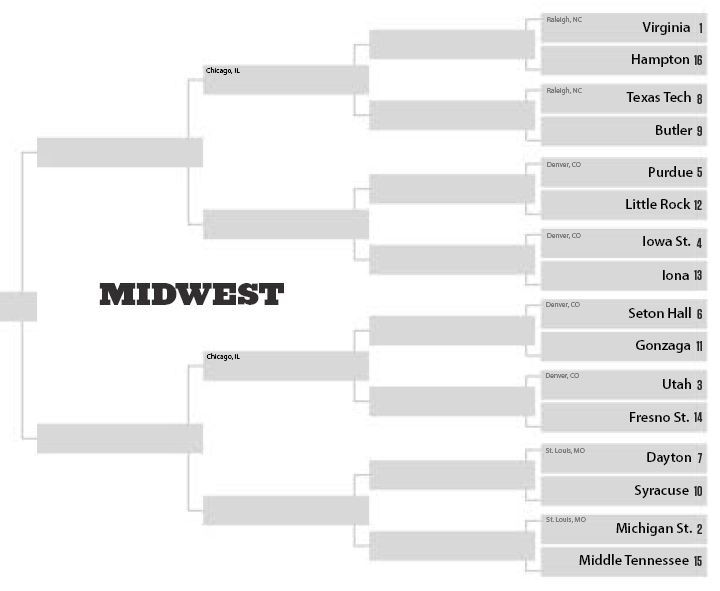

In [4]:
Image(r'C:\Users\mworley\Dropbox\capstone_one\notebooks\midwest_2016_blk.jpg', width=550)

In this group #1 seed Virgina (top row) is considered the best team, followed by #2 seed Michigan State (2nd from bottom), all the way down to #16 seed Hampton. In general, teams with the lower seed in any given matchup are expected to win, and teams are expected to advance until they play a seed lower than their own. 

However, things rarely play out completely as expected, as shown below in the actual game results from the 2016 Midwest region, with wins by the higher seed highlighted. 

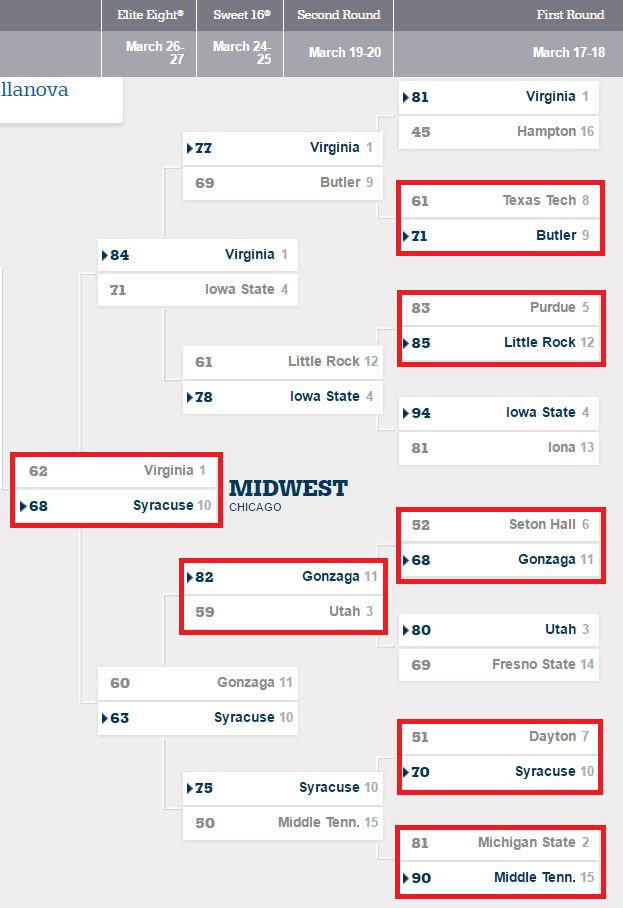

In [5]:
Image(r'C:\Users\mworley\Dropbox\capstone_one\notebooks\midwest_2016_bx.jpg', width=500)

Nearly half of the games were won by the team with the higher seed. These results are why the tournament has been nicknamed "March Madness": the tournament often produces results that defy expectations. 

### Defining an upset

I am specifically interested in these unexpected outcomes, which are referred to as "upsets". An upset occurs when a team with a much higher seed (the "underdog") plays a team with a lower seed (the "favorite"), and the underdog wins the game. Not every game has potential for an upset; no one is shocked when an 9-seed beats an 8-seed. So I will focus on games with "upset potential", using the difference between the seeds of the opponents as the criteria.  

### I define an upset as a win by a team seeded at least 4 slots higher than its opponent. 

Each upset is unexpected, but NCAA tournament fans are well aware that several upsets occur in the tournament every year. For the millions who participate in bracket contests annually, the challenge lies in picking the right games to predict an upset. 

This notebook will examine previous NCAA tournament games with "upset potential" and data on the teams involved in those games. The goal is to identify characteristics that distinguish the games that resulted in a upset. By identifying these characteristics, we can potentially use them to help predict upsets with greater accuracy in the future. 

## Upset Patterns and Tournament Characteristics
I want to start by taking a broad view of NCAA tournament upsets. One overall question is how many upsets occur each year, and whether the number of upsets appears to be increasing or decreasing over time. This helps provide some context for the rest of the project. 

Below I plot a bar graph with each bar showing the number of upsets in each year. I also plot the overall average of upsets per year (green line), and a regression line showing overall change in upsets per year (red line). This should provide a good overall view of the amount of upsets each year and indicate whether the amount of upsets has changed over time. 

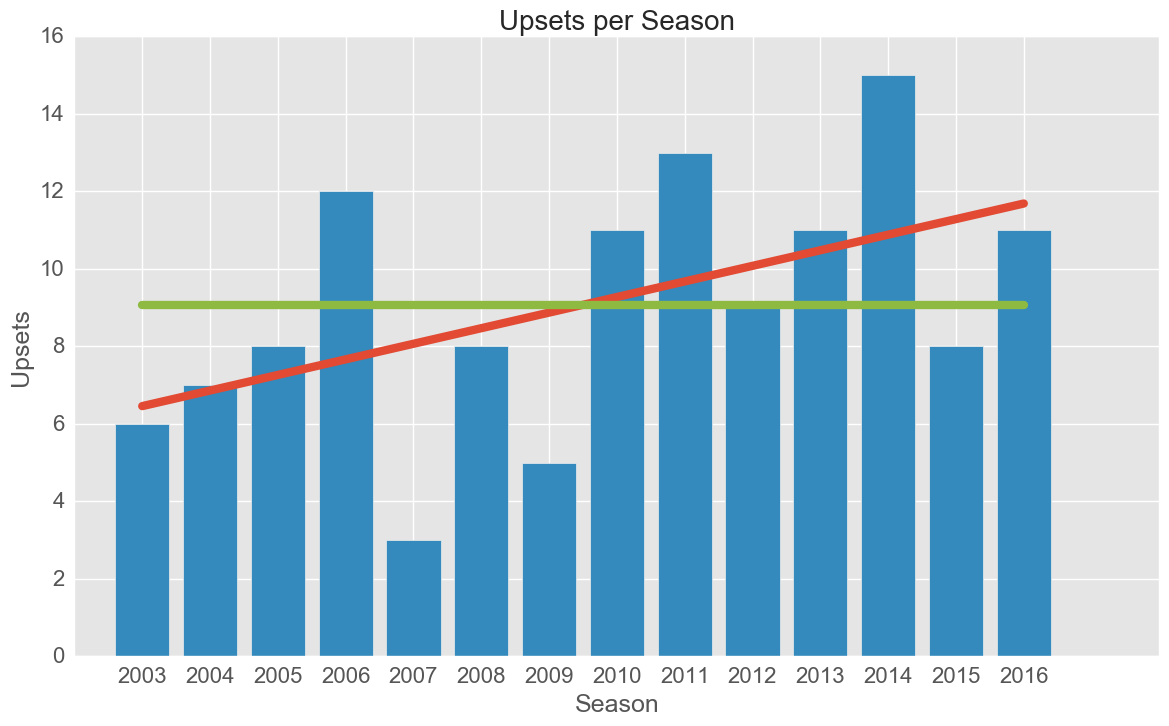

In [6]:
# plot upsets per year over seasons, with regression line
df = data.groupby('season')['upset'].sum().reset_index()
x = df['season']
y = df['upset']
y_mean = [np.mean(y)] * len(x)
y2 = np.polyfit(x, y, deg=1)
fig = plt.figure(figsize=(14,8))
plt.bar(x, y, color=b, align='center')
plt.plot(x, y2[0] * x + y2[1], color=r, linewidth=6)
plt.plot(x, y_mean, color=g, linewidth=6)
plt.title('Upsets per Season', fontsize=20)
plt.xlabel('Season', fontsize=18)
plt.xticks(x, fontsize=16)
plt.ylabel('Upsets', fontsize=18)
plt.yticks(fontsize=16)
plt.show()

The average is around 9 upsets per tournament, and the trend from 2003-2016 is an increase in upsets over time. Upsets were relatively low in the period from 2003-2009 (surpassing 8 only once, in 2006), but since 2010 no tournament had less than 8 upsets.

## Examining Team Seeds and Matchups

As stated above, a team's seed has a major impact on their tournament outlook; it determines the location of their games, the strength of their first opponent, and their most immediate future opponents. 

Because the seed system sets the overall tournament structure, it may be useful to see how the upset-potential games are distributed across the different seeds. The tournament involves 64 teams, but knowing the seeds that are most commonly involved in games with upset potential can help narrow the focus for making upset predictions, and help understand which teams tend to be involved in games where an upset is possible. 

First I want to view the amount of upset-potential games for each "favorite" team seed. I plot a bar graph with each bar showing the total number of upset-potential games for each seed number. 

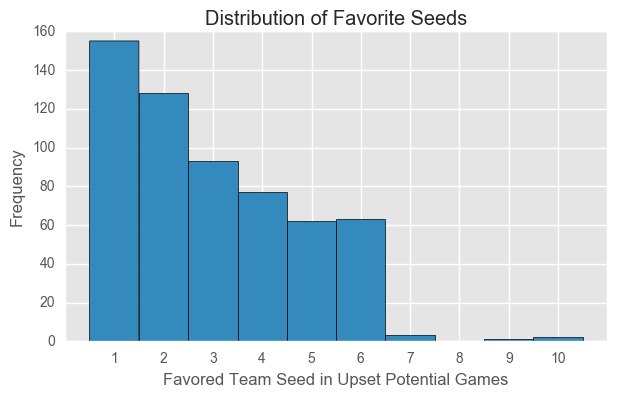

In [7]:
# look at distribution of seeds for favored teams
x = np.array(data.f_seed)
y = list(set(data.f_seed))
bins = np.arange(1, 12) - 0.5
fig = plt.figure(figsize=(7, 4))
plt.hist(x, bins, facecolor=b, edgecolor = "black")
plt.xticks(range(1, 11))
plt.xlim([0, 11])
plt.title('Distribution of Favorite Seeds')
plt.xlabel('Favored Team Seed in Upset Potential Games')
plt.ylabel('Frequency')
plt.show()

The best teams (seeds 1 and 2) are involved in the most upset-potential games. This is not surprising; these are also the teams that tend to last the longest in the tournament, so they also play in the most games. 

Here I plot a similar bar graph for the underdog teams:

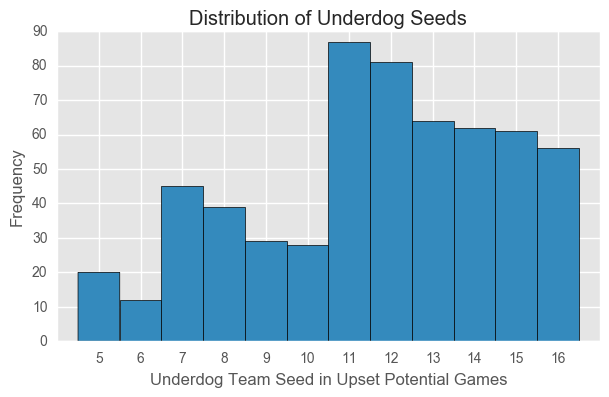

In [8]:
# look at distribution of seeds for underdog teams
x = np.array(data.u_seed)
y = list(set(data.u_seed))
bins = np.arange(5, 18) - 0.5
fig = plt.figure(figsize=(7, 4))
plt.hist(x, bins, facecolor=b, edgecolor = "black")
plt.xticks(range(5, 17))
plt.xlim([4, 17])
plt.title('Distribution of Underdog Seeds')
plt.xlabel('Underdog Team Seed')
plt.xlabel('Underdog Team Seed in Upset Potential Games')
plt.ylabel('Frequency')
plt.show()

In the first round seeds 11-16 always play in matchups that meet the "upset-potential" criteria, so it's not surprising to see that these seeds also play in the most upset-potential games. But the 11-12 seeds stand out as playing in many more upset-potential games than the rest. This may be because these teams often win in the first round and play another favorite in round 2. 

### Visualizing seed matchups
Each tourney game is a matchup between two teams, and the plots above only show data for one side of the matchup at at time. To better identify games with potential for an upset, we'd like to see the specific underdog-favorite seed matchups involved in most of these games. This knowledge will help narrow the focus to particular games when seeking to predict upsets.

To look at the favorite-underdog matchups, I plot a heat map, with underdog seeds on the horizontal axis and favorite seeds on the vertical axis. The cells indicate the number of games that have occurred between specific underdog seeds and favorite seeds, with darker cells involving a greater number of games. 

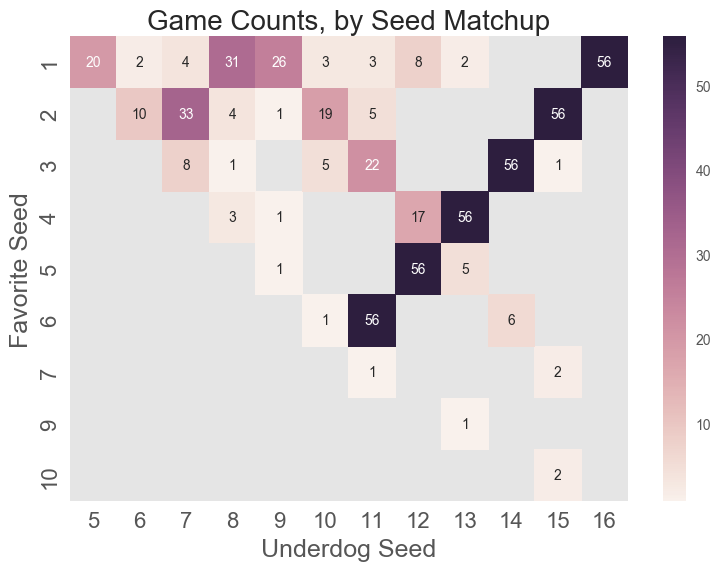

In [9]:
# %% 
# make a heatmap of the 2-way seed grid of upset matchups
# cells are numbers of games
df = data.groupby(['f_seed', 'u_seed'])['upset'].count().reset_index()
ylab = df.f_seed.unique()
ylab = ylab[np.argsort(-ylab)]
xlab = np.sort(df.u_seed.unique())
pt_cnt = pd.pivot_table(df, values='upset', index=['f_seed'], columns=['u_seed'])
fig = plt.figure(figsize=(9, 6))
ax = plt.axes()
sns.heatmap(pt_cnt, annot=True)
ax.set_title('Game Counts, by Seed Matchup', fontsize=20)
ax.set_xlabel('Underdog Seed', fontsize=18)
ax.set_ylabel('Favorite Seed', fontsize=18)
ax.set_xticklabels(xlab, fontsize=16)
ax.set_yticklabels(ylab, fontsize=16)
plt.show()

By far, the most common matchups are the ones that occur in round 1 of the tournament every year; these are the dark purple cells extending down and left from the upper-right corner. 

Another group of common matchups involves the typical second round games for the 1 and 2-seed favorites: 1 vs underdogs 8/9 and 2 vs underdogs 7/10.  
Another group of upset-potential games involve the expected matchups when 11-14s win in the first round and move on to the second round: 11 vs 3, 12 vs 4, 13 vs 5, and 14 vs 6. 

These 14 matchups are interesting because they all occur in the first two rounds of the tournament and also appear to make up a large percentage of the upset-potential games. If this is true, perhaps one could improve their upset prediction accuracy by focusing  on these particular games. 

I'm interested in seeing the proportion of upset-potential games these "common" matchups comprise. I'll examine this question with a stacked bar chart, to visualize the percentage of upset-potential games comprised by these common matchups.  

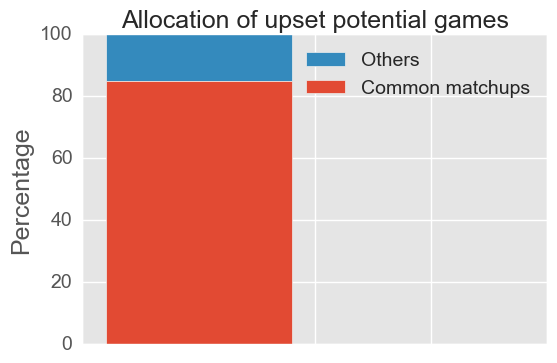

In [10]:
matscom = [(6, 11), (5, 12), (4, 13), (3, 14), (2, 15), (1, 16), (2, 7), 
           (2,10), (1, 8), (1,9), (3, 11), (4, 12), (5, 13), (6, 14)]
df = data 
df['seed_pair'] = zip(data.f_seed, data.u_seed)
df['matcom'] = 'Other'
df.loc[df.seed_pair.isin(matscom), ['matcom']] = 'Common'
dfm = df.groupby('matcom')['upset'].count().reset_index()
dfm['tot'] = np.sum(dfm['upset'])
dfm['pct'] = (dfm.upset / dfm.tot) * 100
y1 = np.array(dfm['pct'][1])
y2 = np.array(dfm['pct'][0])
fig = plt.figure(figsize=(6, 4))
plt.bar(0, y1, color=b, bottom=y2, align="center",)
plt.bar(0, y2, color=r, align="center",)
plt.title('Allocation of upset potential games', fontsize=18)
plt.xlim([-0.5, 1.5])
plt.ylabel('Percentage', fontsize='18')
plt.yticks(fontsize=14)
plt.tick_params(bottom='off', labelbottom='off')
plt.legend(['Others', 'Common matchups'], 
           loc='upper right', fontsize=14)
plt.show()

These 14 "common" upset matchups, which are always played in rounds 1 or 2, account for nearly 85% of games where an upset is possible. 

### Examining upset rates

Ultimately our goal is to identify which "upset potential" games will result in an upset. To meet this goal it would be useful to know how often upsets occur for each seed or seed matchup. If certain favorites and underdogs are involved in upsets more often than others, one can target these teams in making upset predictions. 

In the next bar graph I plot upset "rate", which is the proportion of a seed's upset-potential games that resulted in an upset. This graph will show whether some seeds have lower or higher rates of upsets than others. To understand the sample size for each seed, I also display the number of upset-potential games. If certain upset rates are based on very small number of games, these rates are probably less reliable than the rates calculated from a large number of games. 

Starting with the favorites:

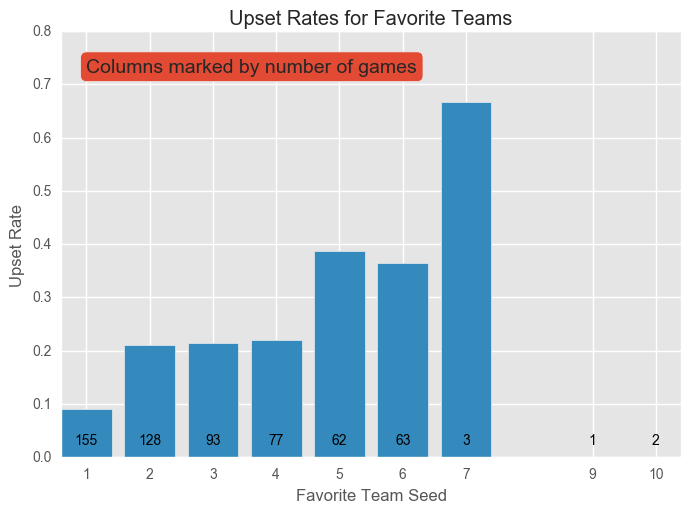

In [11]:
# %%
# let's see which favored teams are most susceptible
# display the percentage of upset-eligible games that each favored seed loses
df = data.groupby('f_seed')['upset'].mean().reset_index()
x = df['f_seed']
y = df['upset']
num = data.groupby('f_seed')['upset'].count().reset_index()['upset']
plt.bar(x, y, color=b, align="center")
plt.title('Upset Rates for Favorite Teams')
plt.xlabel('Favorite Team Seed')
plt.xticks(x)
plt.yticks(np.linspace(0, 0.8, num=9))
plt.ylim(0, 0.8)
plt.ylabel('Upset Rate')
rects = plt.bar(x, y, color=b, align="center")
def autolabel(rects):
    """
    Attach a text label at bottom of each bar displaying number of games
    Number of games is denominator for the rate calculation.    """
    for rect, n in zip(rects, num):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 0.02,
                '%d' % int(n), ha='center', va='bottom', color='black')

autolabel(rects)
plt.text(1, 0.75, "Columns marked by number of games", fontsize=14,
        verticalalignment='top', bbox={'boxstyle': 'round', 'facecolor': r})
plt.show()

Here we see clear differentiation between seeds 1 (upset around 10% of the time), seeds 2-4 (upset around 20% of the time), and seeds 5-6 (upset nearly 40% of the time). Because many 2 seeds are often discussed as potential 1s coming into the tournament, it's interesting to see they're upset at around the same rate as teams seeded 3-4. For seeds 1-6, favorite seed does seem related to upset probability, with the probability of an upset increasing as seed increases.

Favorites seeded 7 are upset at the highest rate by far, but this is only from 3 games, while the 9-10 seeds were never upset (albeit also only from 3 games). Because these teams were the favorite in so few games, these upset rates may not be accurate estimates of what would happen given a larger sample of data. 

Here, a similar bar graph for the underdog teams:

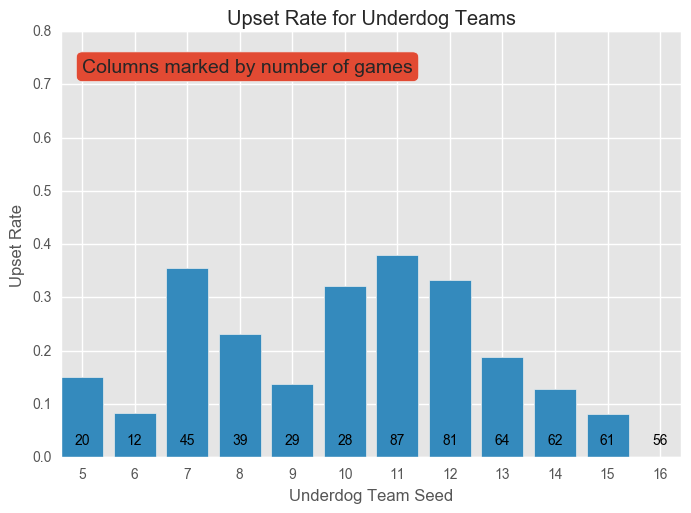

In [12]:
# %%
# let's see which favored teams are most susceptible
# display the percentage of upset-eligible games that each favored seed loses
df = data.groupby('u_seed')['upset'].mean().reset_index()
x = df['u_seed']
y = df['upset']
plt.bar(x, y, color=b, align="center",)
plt.title('Upset Rate for Underdog Teams')
plt.xlabel('Underdog Team Seed')
plt.xticks(x)
plt.yticks(np.linspace(0, 0.8, num=9))
plt.ylim(0, 0.8)
plt.ylabel('Upset Rate')

# get and plot counts of number of games
num = data.groupby('u_seed')['upset'].count().reset_index()['upset']
rects = plt.bar(x, y, color=b, align="center")
def autolabel(rects):
    """
    Attach a text label at bottom of each bar displaying number of games
    Number of games is denominator for the rate calculation.
    """
    for rect, n in zip(rects, num):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 0.02,
                '%d' % int(n), ha='center', va='bottom', color='black')

autolabel(rects)
plt.text(np.min(x), 0.75, "Columns marked by number of games", fontsize=14,
        verticalalignment='top', bbox={'boxstyle': 'round', 'facecolor': r})
plt.show()

There's a group of four underdog seeds that win over 30% of the time (7, 10, 11, and 12). Interestingly, several of the lower underdog seeds (5, 6, 8, and 9) don't upset other teams as often. This is likely due to differences in the favorite seeds involved in the matchups. The winner of the 8-9 matchup in round 1 faces the region's best team (#1 seed) in round 2, so they tend to face tough competition in their upset-potential games. Compare this to the 11/12 seeds who play teams seeded 6/5 in round 1, while 7-10 seeds typically play the 2-seed team in round 2. Apparently, although 2-seed teams are viewed among the best in the tournament, they are quite beatable for teams seeded 7 or 10. 

Based on these differential upset rates for underdog seeds (0-~40%), underdog seed does seem related to upset likelihood, but the pattern isn't as consistent as the pattern for favorite seeds, and probably depends largely on on the favorite team that the underdog plays. 

### Upset rates in seed matchups
As before when examining frequency of upset-potential games, we should visualize upset rates in a way that considers both sides of the matchup. 

Here I look at upset rates for the specific seed matchups, to get a sense of whether particular matchups have noticeably higher or lower upset rates. By visualizing the upset rates for each matchup, we can begin to identify the games with the greatest chance of an upset in the tournament. 

The plots above revealed a set of common matchups that account for a disproportionately large amount of upset-potential games. Because we may want to target this specific group of games when predicting upsets, I'll plot the upset rates for these matchups separately. I'll create two separate heat maps: one for the matchups we identified earlier as being "common", and then a separate heatmap for the rest of the matchups. 

#### First, the common matchups: 

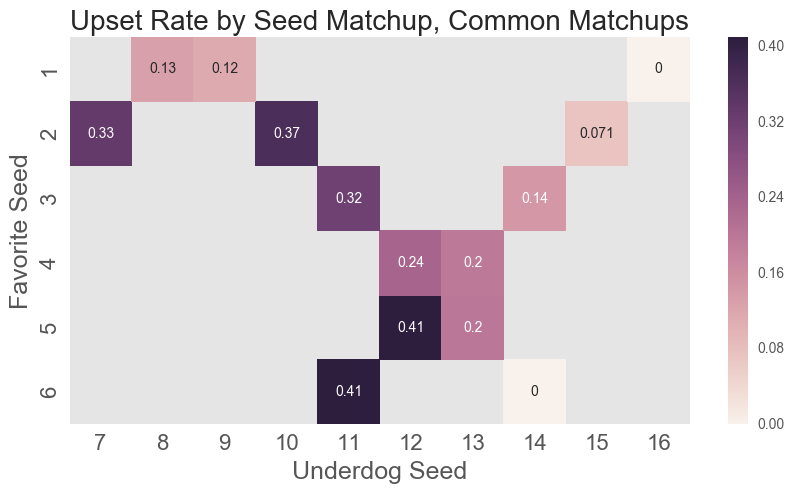

In [13]:
# make a heatmap of the 2-way seed grid of upset rate
# cells are numbers of games
# split the data into and non-common matchups
df = data
df['seed_pair'] = zip(df.f_seed, df.u_seed)
df_com = df.loc[df.seed_pair.isin(matscom)]
df_ncom = df.loc[~df.seed_pair.isin(matscom)]

# common matchups
ylab = df_com.f_seed.unique()
ylab = ylab[np.argsort(-ylab)]
xlab = np.sort(df_com.u_seed.unique())
df_com_cnt = df_com.groupby(['f_seed', 'u_seed'])['upset'].count().reset_index()
df_com_sum = df_com.groupby(['f_seed', 'u_seed'])['upset'].sum().reset_index()
df_com_cnt['rate'] = df_com_sum['upset'] / df_com_cnt['upset']
pt_rate = pd.pivot_table(df_com_cnt, values='rate', index=['f_seed'], columns=['u_seed'])
fig = plt.figure(figsize=(10, 5))
ax = plt.axes()
sns.heatmap(pt_rate, annot=True)
ax.set_title('Upset Rate by Seed Matchup, Common Matchups', fontsize=20)
ax.set_xlabel('Underdog Seed', fontsize=18)
ax.set_ylabel('Favorite Seed', fontsize=18)
ax.set_xticklabels(xlab, fontsize=16)
ax.set_yticklabels(ylab, fontsize=16)
plt.show()

For matchups extending from the upper-right corner (which we identified earlier as being the most common), the upset rate  increases as the gap between seeds decreases. For the rest of the games, the highest upset rates are actually for 2-seeds against 7s and 10s. This is surprising because 2-seeds are among the favorites to win the title, but they actually have less than 70% chance of winning in round 2. 

Another noticable trend is that several matchups have a similar seed gap of 8 (the diagonal extending southeast from 2 vs. 10), and the upset rates decline as the seed numbers increase. 

Despite among the highest-rated underdogs in the grid, the 8/9 seeds have some of the lowest upset rates, likely owing to their difficult opponent in 1-seed teams. 

#### Next, the non-common matchups. 
Because this entire group only accounts for 15% of games where an upset is possible, each seed pairing may occur rarely, which limits the consistency we can expect from the upset rates shown here. To understand the sample size for each matchups, I'll also plot a heatmap that displays the number of games of each matchup type that have been played. 

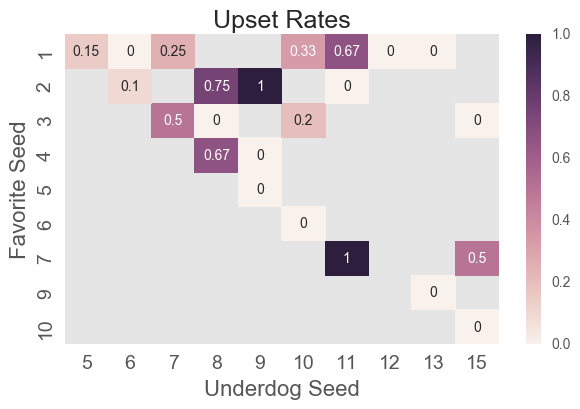

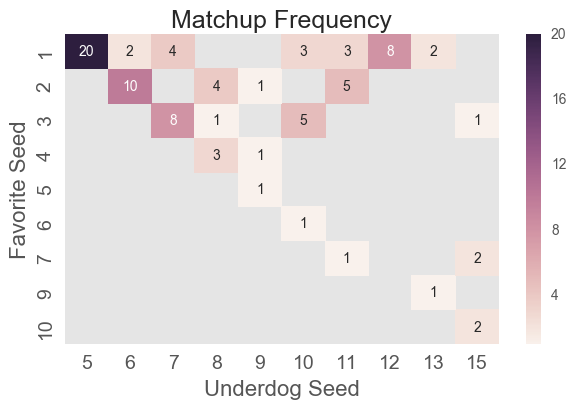

In [14]:
# non-common matchups
ylab = df_ncom.f_seed.unique()
ylab = ylab[np.argsort(-ylab)]
xlab = np.sort(df_ncom.u_seed.unique())
df_ncom_cnt = df_ncom.groupby(['f_seed', 'u_seed'])['upset'].count().reset_index()
df_ncom_sum = df_ncom.groupby(['f_seed', 'u_seed'])['upset'].sum().reset_index()
df_ncom_cnt['rate'] = df_ncom_sum['upset'] / df_ncom_cnt['upset']
pt_rate = pd.pivot_table(df_ncom_cnt, values='rate', index=['f_seed'], columns=['u_seed'])
fig = plt.figure(figsize=(7, 4))
ax = plt.axes()
sns.heatmap(pt_rate, annot=True)
ax.set_title('Upset Rates', fontsize=18)
ax.set_xlabel('Underdog Seed', fontsize=16)
ax.set_ylabel('Favorite Seed', fontsize=16)
ax.set_xticklabels(xlab, fontsize=14)
ax.set_yticklabels(ylab, fontsize=14)
plt.show()


pt_cnt = pd.pivot_table(df_ncom_cnt, values='upset', index=['f_seed'], columns=['u_seed'])
fig = plt.figure(figsize=(7, 4))
ax = plt.axes()
sns.heatmap(pt_cnt, annot=True)
ax.set_title('Matchup Frequency', fontsize=18)
ax.set_xlabel('Underdog Seed', fontsize=16)
ax.set_ylabel('Favorite Seed', fontsize=16)
ax.set_xticklabels(xlab, fontsize=14)
ax.set_yticklabels(ylab, fontsize=14)
plt.show()

Each matchup is pretty rare: with the exception of 1 vs 5, each occurs (on average) less than once per tournament. These matchups all also occur after the first two rounds of the tournament, after the field of teams has been narrowed down to 16.  Since the seeds 5-15 are outside the 16 highest-rated teams, each underdog must have already exceeded expectations and beaten a lower-seeded team for any of these matchups to occur. 

### Upsets by Tournament Round
So far we've broken down upsets mostly by team seeds and matchups. In addition to knowing the types of matchups most likely to produce upsets, upset prediction might be aided by knowledge of the stage of the tournament upsets are likely to occur. 

Each year the tournament follows a consistent structure with 6 distinct "rounds" of play. Teams play games in rounds 1 and 2 at the same location roughly 48 hours apart. After a 5-day break, teams play games in rounds 3 and 4 at a new location. The "Final Four" finish the tournament in rounds 5 and 6 at the final tournament location. 

To look at when upsets happen, I'll plot a bar graph with each bar indicating the number of upsets that occurred in each round of the tournament. 

(array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 <a list of 8 Text yticklabel objects>)

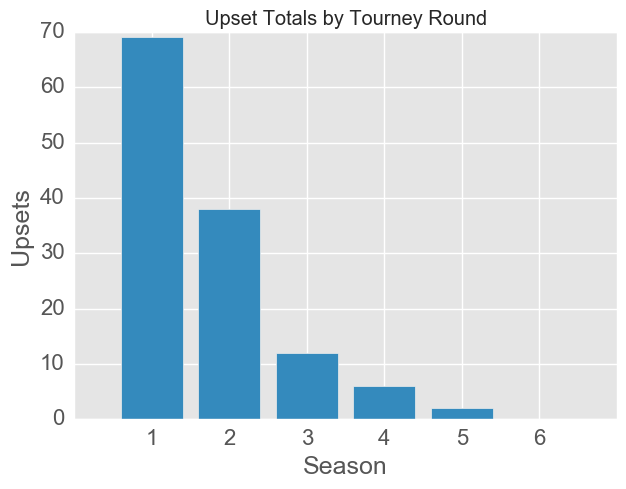

In [15]:
# which rounds have the most upsets?
df = data.groupby('rnd')['upset'].sum().reset_index()
x = df['rnd']
y = df['upset']
fig = plt.figure(figsize=(7, 5))
plt.bar(x, y, color=b, align="center",)
plt.title('Upset Totals by Tourney Round')
plt.xlabel('Season', fontsize=18)
plt.xticks(x, fontsize=16)
plt.ylabel('Upsets', fontsize=18)
plt.yticks(fontsize=16)

Most upsets occur in round 1 with fewer upsets occuring in each subsequent round. No surprise here as the most total games also occur in round 1, with half as many games in each subsequent round. To understand whether upset-potential games in different rounds have different upset probabilities, we need to account for differences between rounds in the number of games played. 

As displayed earlier for team seeds, here I examine the "upset rate", computed as the percentage of upset-potential games that result in an upset. I use a bar graph to examine the upset rate separately for each round. I also add the number of upset-potential games to the plot, to understand the sample size for each round. 

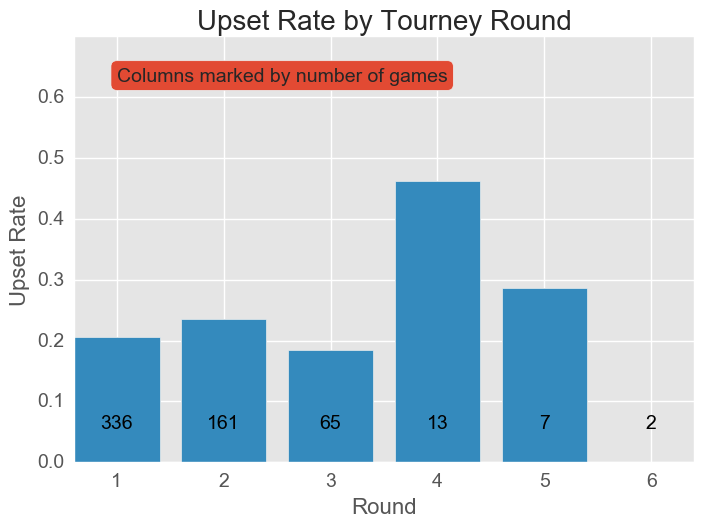

In [16]:
# in which rounds are upsets most likely to occur?
df = data.groupby('rnd')['upset'].mean().reset_index()
x = df['rnd']
y = df['upset']
plt.bar(x, y, color=b, align="center",)
plt.title('Upset Rate by Tourney Round', fontsize=20)
plt.xlabel('Round', fontsize=16)
plt.xticks(x)
plt.ylabel('Upset Rate', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 0.7)
num = data.groupby('rnd')['upset'].count().reset_index()['upset']
rects = plt.bar(x, y, color=b, align="center")
def autolabel(rects):
    """
    Attach a text label at bottom of each bar displaying number of games
    Number of games is denominator for the rate calculation.
    """
    for rect, n in zip(rects, num):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 0.05,
                '%d' % int(n), ha='center', va='bottom', color='black', fontsize=14)

autolabel(rects)
plt.text(np.min(x), 0.65, "Columns marked by number of games", fontsize=14,
        verticalalignment='top', bbox={'boxstyle': 'round', 'facecolor': r})
plt.show()

Upset rate doesn't appear to drop off very much as the tourney progresses from rounds 1-3, staying close to 20% in each round. Most tournament fans are aware that most of the upsets occur in the first two rounds, but may be surprised to learn that upset-potential games in rounds 1-3 all have similar upset rates.

The upset rates in rounds 4 and 5 even greater, but we also have much less data on these games.

So far we've examined upsets mainly via the lens of the tournament structure. For instance, we know that some matchups (6 seed vs 11 seed) produce higher rates of upsets than others (1 seed vs 16 seed). However, we also know that some matchups with the highest rates still only produce upsets around 40% of the time. So, given a particular matchup, how can we decide whether an upset is likely to happen?

## Team Characteristics and Upsets
The teams assigned any particular seed are believed to be similar in overall quality, but can be quite different from each other in many facets of basketball. One team may play at a fast pace and try to score alot of points, while another plays slowly and wins games by playing good defense. One team may feature several older players who have played in previous tournaments, while another relies on talented youngsters with no prior tournament participation. Each team is unique and establishes a unique profile of performance in the course of around 30 games each season. In the next phase of this project, I'll dive into some of the measurable characteristics of teams involved in upset-potential games, to see if any of these features can separate upsets from the rest.

### Team ratings - offense and defense

For each team, in-game performance can be divided into 2 phases of the game with distinct objectives: 1) offense, when the team has the ball and the objective is to score, and 2) defense, when the opponent has the ball and the objective is to prevent them from scoring. In general, teams with better offense and defense are expected to win more games, but how do we know which team's offense or defense is "better" than another?

Fortunately, college basketball experts have created rating systems for team offenses and defenses that adjust for important influences on the amount of points scored in each game, such as strength of opponents and speed of play. These adjustments allow us to make direct comparisons between teams on their prior offensive and defensive performance, even if teams differ greatly in the difficulty of their schedule or the pace at which they play. 

In one of the most well-known systems of team ratings (http://kenpom.com/), each team has a separate offensive and defensive efficiency rating. The interpretation of each is fairly straightforward: the average score is 100, with better offenses receiving higher ratings (more points scored), and better defenses lower ratings (less points allowed). 

### Underdogs - offense and defense
I suspect that underdogs with good offenses and defenses are the ones with the best chance of pulling an upset. So far, we've treated "upset" as a an event with only two possibilities: an upset or not. It would also be interesting to see whether underdogs with better offenses and defenses are more likely to come close, even if they lost. Perhaps if the ball had bounced a different way on a couple shots, the underdog could have won. 

To examine this question I use a scatterplot where the vertical axis is the final score margin for the underdog team in every upset-potential NCAA tournament game. Score margins above 0 indicate a win for the underdog (an "upset") while margins below 0 indicate a loss. Because I'm interested in both offense and defensive ratings, two plots are produced: one with offensive efficiency on the horizontal axis (left), and one with defensive efficiency on the horizontal axis (right). This type of plot allows us to see in one view whether upsets are more likely for underdogs with good offense, good defense, or both. 

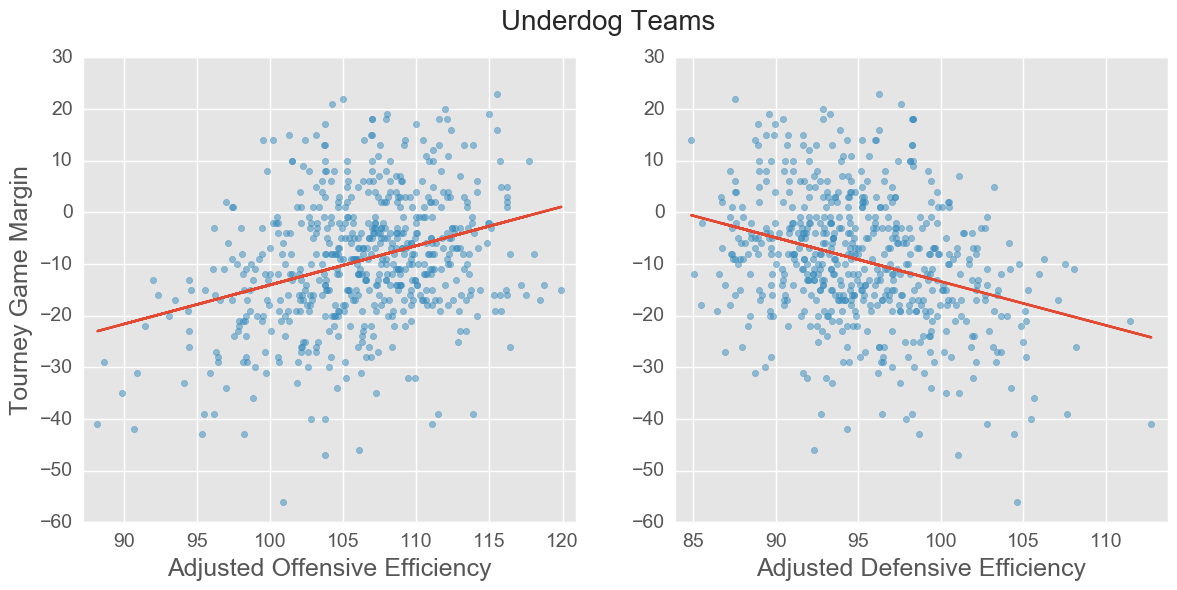

In [17]:
# let's examine relationships between some team features and game outcomes
# focus on underdog teams first
df = data
fig = plt.figure(figsize=(14,6))
st = fig.suptitle("Underdog Teams", fontsize=20)
plt.subplot(1, 2, 1)
x = df['u_adjoe']
y = df['u_scoremarg']
y2 = np.polyfit(x, y, deg=1)
plt.scatter(x, y, color=b, alpha=0.5)
plt.plot(x, y2[0] * x + y2[1], color=r)
plt.xlabel('Adjusted Offensive Efficiency', fontsize=18)
plt.xlim([np.min(x) - 1, np.max(x) + 1])
plt.ylabel('Tourney Game Margin', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.subplot(1, 2, 2)
df = data
x = df['u_adjde']
y = df['u_scoremarg']
y2 = np.polyfit(x, y, deg=1)
plt.scatter(x, y, color=b, alpha=0.5)
plt.plot(x, y2[0] * x + y2[1], color=r)
plt.xlabel('Adjusted Defensive Efficiency', fontsize=18)
plt.xlim([np.min(x) - 1, np.max(x) + 1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Underdogs with better offense have a higher game margin value, while underdogs with low offensive effiency tend to lose by a lot of points. Nearly all of the upsets (game margins above 0) occur when the underdog team has above 100 efficiency. At the same time, many underdogs with offensive efficiency still lose to favorites. 

Underdogs with better defense (lower defensive efficiency) also have a higher game margin value. Similar to the offense, a defensive efficiency of 100 seems to be an important point; nearly all upsets occur when underdogs have defensive efficiency below this level. However, many underdogs meeting this criteria still lose. 

This plot suggests that for underdogs, having both a good offense and good defense are prequisites for pulling an upset, but these factors alone don't fully account for which underdogs ultimately win. 

### Favorites - offense and defense
Now I view a similar plot for the favorites, with their tourney game margin (favorite score - underdog score) on the vertical axis, plotted over their offensive and defensive efficiency. In this plot, an upset (a loss by the favorite) is indicated by a  margin score below 0. 

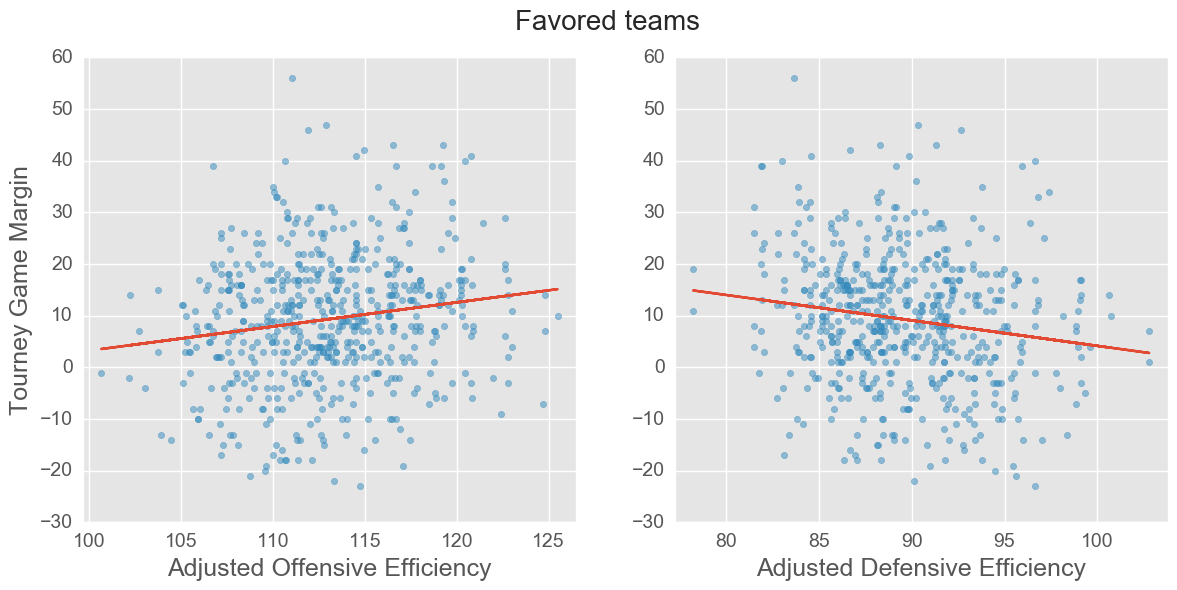

In [18]:
# now looking at the favored teams
df = data
fig = plt.figure(figsize=(14,6))
st = fig.suptitle("Favored teams", fontsize=20)
plt.subplot(1, 2, 1)
x = df['f_adjoe']
y = df['f_scoremarg']
y2 = np.polyfit(x, y, deg=1)
plt.scatter(x, y, color=b, alpha=0.5)
plt.plot(x, y2[0] * x + y2[1], color=r)
plt.xlabel('Adjusted Offensive Efficiency', fontsize=18)
plt.xlim([np.min(x) - 1, np.max(x) + 1])
plt.ylabel('Tourney Game Margin', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.subplot(1, 2, 2)
df = data
x = df['f_adjde']
y = df['f_scoremarg']
y2 = np.polyfit(x, y, deg=1)
plt.scatter(x, y, color=b, alpha=0.5)
plt.plot(x, y2[0] * x + y2[1], color=r)
plt.xlabel('Adjusted Defensive Efficiency', fontsize=18)
plt.xlim([np.min(x) - 1, np.max(x) + 1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

One noticeable aspect of the favorite teams is their relative superiority on these two features; every single team is good offensively (above 100), and nearly all are also good defensively (below 100). For the favorites, the  lines of best fit don't appear to be as steep, and there isn't as clear of a cutoff that signals when upsets occur. So, the relationship between these features and winning doesn't seem as clear-cut as compared to the underdogs. 

### Team Efficiency Margin

Offensive and defensive efficency can be combined into a single rating, adjusted efficiency margin. Calculated as offensive efficiency - defensive efficiency, it represents the expected margin of victory a team would have against an average opponent. In essence, it's a single rating that describes how good a team is, given their performance in all previous games that season.

Because each upset-potential game pits a favorite against an underdog, it would be interesting to plot the efficiency margins for each matchup, and see whether any particular patterns differentiate upsets from non-upsets. Here I use a scatterplot to view the intersection of underdog and favorite efficiency margin for every upset-potential tournament game. I also use distinct markers for upsets and non-upsets, to see if there's a pattern to when upsets occur.  

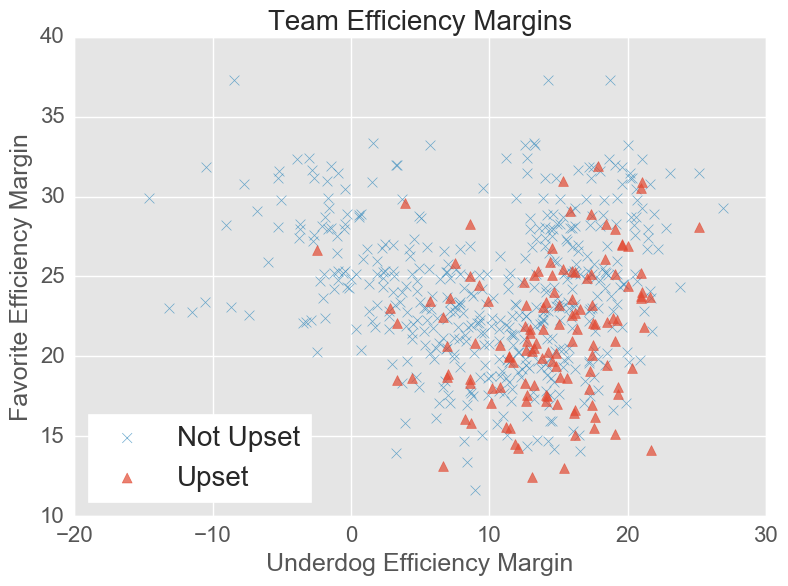

In [19]:
# adjusted efficiency margin
df = data
fig = plt.figure(figsize=(8, 6))
x1 = df.loc[df.upset==0, 'u_em']
y1 = df.loc[df.upset==0, 'f_em']
x2 = df.loc[df.upset==1, 'u_em']
y2 = df.loc[df.upset==1, 'f_em']
plt.scatter(x1, y1, s=50, marker='x', color=b, alpha=0.7, label='Not Upset')
plt.scatter(x2, y2, s=50, marker='^', color=r, alpha=0.7, label = 'Upset')
plt.title('Team Efficiency Margins', fontsize=20)
plt.xlabel('Underdog Efficiency Margin', fontsize=18)
plt.ylabel('Favorite Efficiency Margin',  fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
legend = plt.legend(frameon=True, fontsize=20, loc='lower left')
frame = legend.get_frame()
frame.set_facecolor('white')
plt.show()

It looks like upsets happen most often when the underdog has higher efficiency margin (10 or more) and the favorite has a relatively low margin (25 or less). Although some upsets exist outside of these bounds, upsets appear to be the most concentrated when both of these cutoffs are met.

To get a sense of whether these cutoffs are meaningful, I'd like to split the sample into 2 separate groups of games: those that meet these cutoffs and those that don't. I'll plot the average upset rate separately for these 2 groups, to see whether the games meeting this cutoff do have a much higher upset rate. 

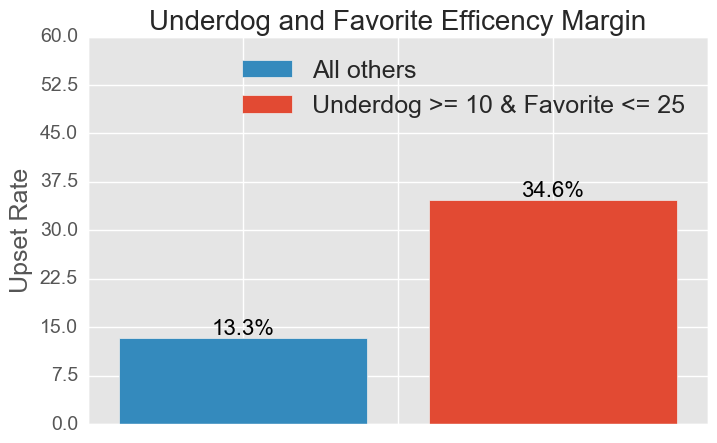

In [20]:
# split games into underdog em at least 10 & favorite em 25 or less
mask = (data.u_em >= 10) & (data.f_em <= 25)
y1 = data[~mask]['upset'].mean() * 100
y2 = data[mask]['upset'].mean() * 100
fig = plt.figure(figsize=(8, 5))
bar1 = plt.bar(0, y1, color=b, align="center",)
bar2 = plt.bar(1, y2, color=r, align="center",)
plt.title('Underdog and Favorite Efficency Margin', fontsize=20)
plt.xlim([-0.5, 1.5])
plt.ylabel('Upset Rate', fontsize='18')
plt.yticks(np.linspace(0, 60, num=9), fontsize=14)
plt.tick_params(bottom='off', labelbottom='off')
plt.text(0, y1, '%s' % str(round(y1, 1)) + '%', ha='center', va='bottom', color='black', fontsize=16)
plt.text(1, y2, '%s' % str(round(y2, 1)) + '%', ha='center', va='bottom', color='black', fontsize=16)
plt.legend([ 'All others', 'Underdog >= 10 & Favorite <= 25'], 
           loc='upper right', fontsize=18)
plt.show()

The games meeting the cutoff have nearly 3 times the upset rate as games that don't meet the cutoff. That looks like a meaningful difference! 

### The importance of travel distance

In the NCAA tournament games are played in various locations around the country. Teams with low seeds (particularly 1-2 seeds) are often assigned to play relatively close to their home campus, while the higher-seeded teams may have to travel hundreds of miles further to their initial game. 

Teams who play closer to home may have an advantage, perhaps due to the reduced time and energy spent travelling to the game, more fan support at the game, or some combination of these factors. 

First let's verify whether the seeds actually have different levels of travel distance as expected. Here I use a bar graph to plot the average travel distance for each seed group, first for the favorites, and then the underdogs. 

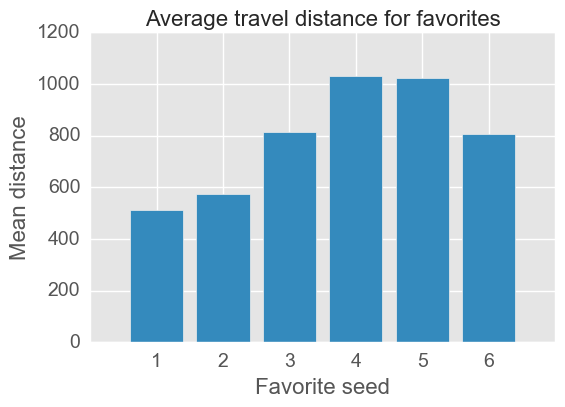

In [21]:
# favorite seeds, ignoring the rare-occurence favorites (seeds 7-10)
df_fav = data[data.f_seed < 7].groupby('f_seed')['f_dist'].mean().reset_index()
x = df_fav['f_seed']
y = df_fav['f_dist']
fig = plt.figure(figsize=(6, 4))
plt.bar(x, y, color=b, align='center')
plt.title('Average travel distance for favorites', fontsize=16)
plt.xlabel('Favorite seed', fontsize=16)
plt.xticks(x, fontsize=14)
plt.ylabel('Mean distance', fontsize=16)
plt.yticks(fontsize=14)
plt.show()

For the favorites, lower seeds do have the lowest travel distance. Interestingly, the distances increase gradually from seeds 1-4, while 6-seeds have an average distance similar to 3-seeds (and noticeably lower than 4-5 seeds).

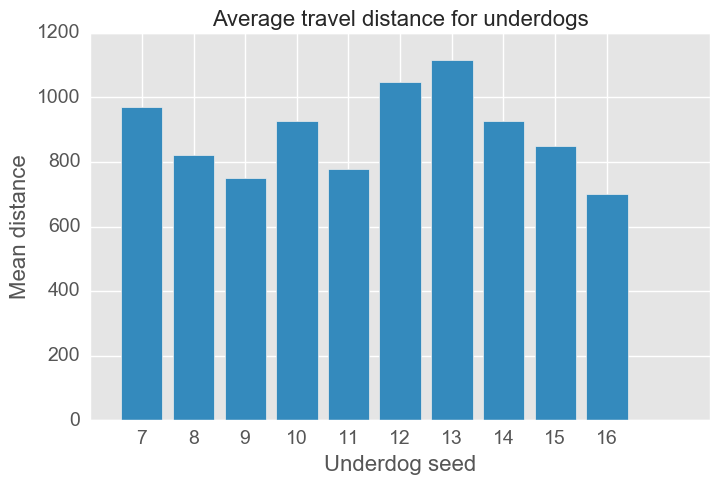

In [22]:
# underdog seeds, focusing on the high-frequency underdog seeds (7 and above)
df_fav = data[data.u_seed >= 7].groupby('u_seed')['u_dist'].mean().reset_index()
x = df_fav['u_seed']
y = df_fav['u_dist']
fig = plt.figure(figsize=(8, 5))
plt.bar(x, y, color=b, align='center')
plt.title('Average travel distance for underdogs', fontsize=16)
plt.xlabel('Underdog seed', fontsize=16)
plt.xticks(x, fontsize=14)
plt.ylabel('Mean distance', fontsize=16)
plt.yticks(fontsize=14)
plt.show()

The underdogs don't show as clear of a pattern as the favorites. Considering both plots together, it appears that #1 seeds and #2 seeds have lower travel distance compared to everyone else, who are all near the 800-1000 mile range. 

We'd like to know if travel distance is related to upset likelihood. In general, we expect underdogs to travel further than favorites, but if the favorite's travel distance advantage is small, is an upset more likely to occur?

Below I produce a separate bar graph for non-upsets and upsets, with each bar graph showing the average travel distance for underdogs and favorites. By plotting these bars side-by-side, we can see whether upsets and non-upsets differed in the travel distance for the competing teams. 

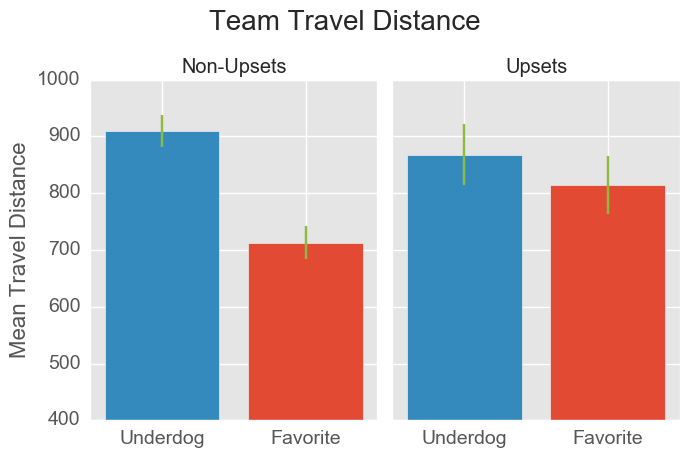

In [23]:
# compare travel distance for upsets and non-upsets
# separately for favorite team and underdogs
fig = plt.figure(figsize=(7, 5))
st = fig.suptitle("Team Travel Distance", fontsize=20)
fig.subplots_adjust(top=0.3)
plt.subplot(1, 2, 1)
functions = ['mean', 'std', 'count']
df = data.groupby('upset', as_index=False)['u_dist', 'f_dist'].agg(functions).reset_index()
df_1 = df['u_dist'][df.upset==0].append(df['f_dist'][df.upset==0])
x = [0, 1]
y = df_1['mean']
se = df_1['std'].divide(np.sqrt(df_1['count']))
plt.bar(x, y, color=[b, r], yerr=se, ecolor=g, align="center")
plt.title('Non-Upsets')
x_lab = ['Underdog', 'Favorite']
plt.xticks(x, x_lab, fontsize='14')
plt.xlim([np.min(x) - 0.5, np.max(x) + 0.5])
plt.ylabel('Mean Travel Distance', fontsize='16')
plt.ylim([400, 1000])
plt.yticks(np.linspace(400, 1000, num=7), fontsize=14)
plt.subplot(1, 2, 2)
df_2 = df['u_dist'][df.upset==1].append(df['f_dist'][df.upset==1])
x = [0, 1]
y = df_2['mean']
se = df_2['std'].divide(np.sqrt(df_2['count']))
plt.bar(x, y, color=[b, r], yerr=se, ecolor=g, align="center")
plt.title('Upsets')
plt.xticks(x, x_lab, fontsize='14')
plt.xlim([np.min(x) - 0.5, np.max(x) + 0.5])
plt.ylim([400, 1000])
plt.yticks(np.linspace(400, 1000, num=7), fontsize=14)
plt.tick_params(axis='both', left='off', labelleft='off')
plt.tight_layout()
plt.show()

In non-upsets, favorites have a clear advantage in average travel distance; they travel less distance than the underdogs by around 200 miles. In upsets, favorites still have an advantage, but it is much smaller. The smaller travel gap in upsets seems mostly attributable to the greater travel distance involved for favorites; on average, these favorites who were upset traveled around 100 miles further than favorites who won. 

### Tournament experience
Basketball experts often discuss the importance of tournament experience, believing that teams with prior tournament experience are better prepared to handle the high-pressure environment of tournament games. In line with this theory, underdogs with tournament experience could more likely to defeat a favored team, while favorites without prior tourney experience may underperform. 

A simple way to look at tourney experience is to examine whether a team played in the NCAA tournament in the prior year. Here, I plot the percentage of underdogs and favorites who played in the prior year's tournament, shown separately for games resulting in non-upsets and upsets. 

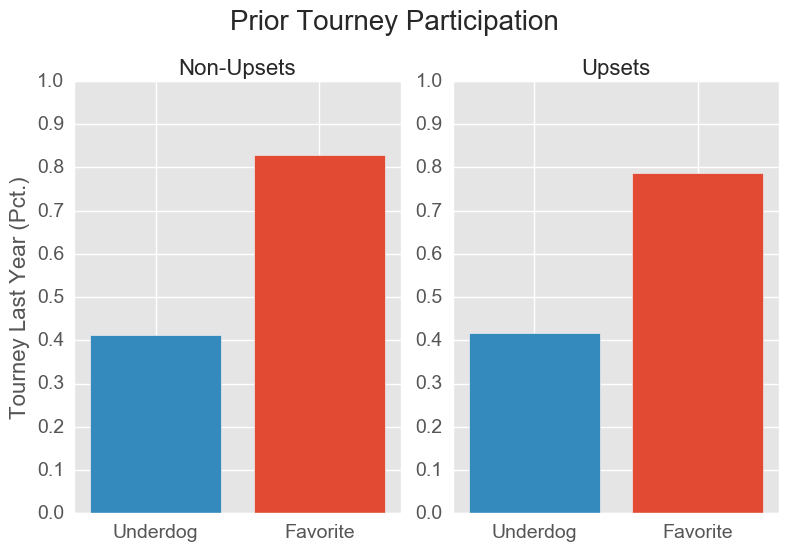

In [24]:
# school went to tournament in prior year
# separately for favored team and underdogs
fig = plt.figure(figsize=(8, 6))
st = fig.suptitle('Prior Tourney Participation', fontsize=20)
fig.subplots_adjust(top=0.3)
plt.subplot(1, 2, 1)
df = data.groupby('upset')['u_schlast', 'f_schlast'].mean().reset_index()
x = df['upset']
y = df.loc[0][1:]
plt.bar(x, y, color=[b, r], align="center",)
plt.title('Non-Upsets', fontsize=16)
x_lab = ['Underdog', 'Favorite']
plt.xticks(x, x_lab, fontsize=14)
plt.xlim([np.min(x) - 0.5, np.max(x) + 0.5])
plt.ylabel('Tourney Last Year (Pct.)', fontsize=16)
plt.yticks(np.linspace(0, 1, num=11), fontsize=14)
plt.ylim([0, 1])
plt.subplot(1, 2, 2)
x = df['upset']
y = df.loc[1][1:]
plt.bar(x, y, color=[b, r], align="center",)
plt.title('Upsets', fontsize=16)
plt.xticks(x, x_lab, fontsize=14)
plt.xlim([np.min(x) - 0.5, np.max(x) + 0.5])
plt.yticks(np.linspace(0, 1, num=11), fontsize=14)
plt.ylim([0, 1])
plt.tight_layout()
plt.show()

When viewed in this basic way, tournament experience doesn't seem related to the chance of an upset, but this basic method also doesn't account for a couple of important factors. Teams who played in the tournament last year could have gained anywhere from 1-6 games' worth of experience, depending on the number of games played. Also, if a team's current roster has few players from last year's team, last year's tournament experience may not be relevant, because the players who gained that experience are no longer around. 

To examine tournament experience in a way that is sensitive to these factors I calculated a tourney experience "index", calculated as the number of games played in last year's tournament multiplied by the percentage of a team's playing time allocated to returning players. Similar to the travel distance plot above, I plot the average tourney experience index separately for underdogs/favorites in non-upsets and upsets, to see whether experience may contribute to upsets.

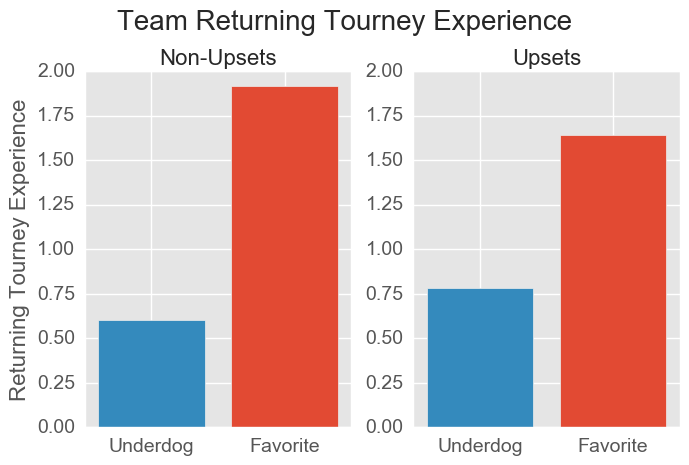

In [25]:
# compare returning tournament experience for upsets and non-upsets
# experience is a calculated feature
# experience = minutes percentage of returning players * # of games played in last year's tournament
# separately for favorites and underdogs
fig = plt.figure(figsize=(7, 5))
st = fig.suptitle("Team Returning Tourney Experience", fontsize=20)
fig.subplots_adjust(top=0.5)
plt.subplot(1, 2, 1)
df = data.groupby('upset')['u_texp', 'f_texp'].mean().reset_index()
x = df['upset']
y = df.loc[0][1:]
plt.bar(x, y, color=[b, r], align="center",)
plt.title('Non-Upsets', fontsize=16)
x_lab = ['Underdog', 'Favorite']
plt.xticks(x, x_lab, fontsize='14')
plt.xlim([np.min(x) - 0.5, np.max(x) + 0.5])
plt.ylabel('Returning Tourney Experience', fontsize='16')
plt.yticks(np.linspace(0, 2, num=9), fontsize=14)
plt.subplot(1, 2, 2)
x = df['upset']
y = df.loc[1][1:]
plt.bar(x, y, color=[b, r], align="center",)
plt.title('Upsets', fontsize=16)
plt.xticks(x, x_lab, fontsize='14')
plt.xlim([np.min(x) - 0.5, np.max(x) + 0.5])
plt.yticks(np.linspace(0, 2, num=9), fontsize=14)
plt.tight_layout()
plt.show()

Compared to the teams involved in non-upsets, underdogs in upsets have more tourney experience, while the favorites in upsets have less. 

### Offensive rebounding and turnovers
In basketball each team has a certain amount of opportunities to score points, but the amount changes from game to game. Teams always receive the ball after their opponent scores, but can also generate additional scoring opportunities. One way is offensive rebounds: when a team misses a shot, they can grab the ball and attempt another one. Teams also acquire the ball when their opponent turns it over, due to the unintentionally losing the ball or committing a rules violation, thereby losing a scoring opportunity. Successful teams are often the ones who can grab more offensive rebounds and commit fewer turnovers than their opponent, resulting in more opportunities to score points. 

The advantage of creating extra possessions may be especially important for underdogs who play favored teams. As players on the favorite teams are often superior in the physical aspects of play (e.g., speed, strength, and size), underdogs may need to rely more heavily on creating extra opportunities to score.  

Here I plot the offensive rebound and turnover margin, which represents the average number of extra posessions per game a team gains by having more offensive rebounds or fewer turnovers than their opponent.

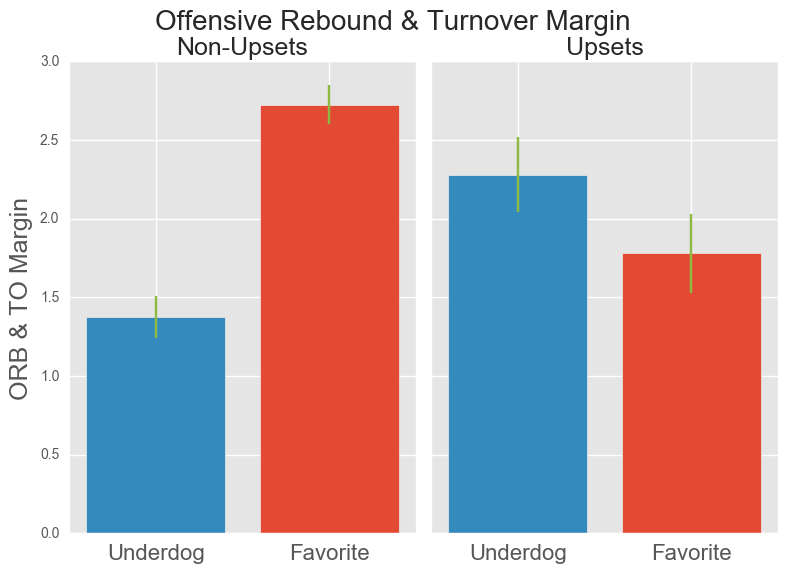

In [26]:
# offensive rebounding + turnover margins
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(8, 6))
fig.subplots_adjust(top=0.3)
st = fig.suptitle('Offensive Rebound & Turnover Margin', fontsize=20)
functions = ['mean', 'std', 'count']
under = 'u_orbtomarg'
fav = 'f_orbtomarg'
ymean = np.mean(data[[under, fav]].mean())
ystd = np.max(data[[under, fav]].std())
df = data.groupby('upset', as_index=False)[under, fav].agg(functions).reset_index()
df_1 = df[under][df.upset==0].append(df[fav][df.upset==0])
x = [0, 1]
y = df_1['mean']
se = df_1['std'].divide(np.sqrt(df_1['count']))
ax1.bar(x, y, color=[b, r], yerr=se, ecolor=g, align="center")
ax1.set_title('Non-Upsets', fontsize=18)
x_lab = ['Underdog', 'Favorite']
ax1.set_xticks(x)
ax1.set_xticklabels(x_lab, fontsize=16)
ax1.set_xlim([np.min(x) - 0.5, np.max(x) + 0.5])
ax1.set_ylabel('ORB & TO Margin', fontsize='18')
y_low1 = y - se
y_hi1 = y + se
se1 = se
df_2 = df[under][df.upset==1].append(df[fav][df.upset==1])
y = df_2['mean']
se = df_2['std'].divide(np.sqrt(df_2['count']))
ax2.bar(x, y, color=[b, r], yerr=se, ecolor=g, align="center")
ax2.set_title('Upsets', fontsize=18)
ax2.set_xticklabels(x_lab, fontsize=16)
ax1.set_ylim(0, 3)
plt.tight_layout()
plt.show()

The pattern here is pretty striking: favorites in non-upsets have a much higher margin than underdogs, but in upsets the underdog teams have a higher average margin than the favorites. These results suggest underdogs with better offensive rebounding & turnover margins than their opponent are promising candidates for pulling an upset.

### Underdog 3-point shooting
On offense, not every basket is equal: shots taken from outside the 3-point line are worth 3 points, while shots taken from inside the arc are worth 2. 
Good 3-point shooting is often discussed as the great "equalizer" that allows underdogs to defeat favored teams. An underdog may not have as many big, talented players that can score easily near the rim, but by knocking down 3-point shots they can compete with the more talented team. 

Using the same bar graphs as above, let's see if better 3-point shooting tends to separate the underdogs and favorites in non-upsets and upsets. Here I plot each team's 3-point shooting percentage, which is the percentage of 3-point shots made during the season. 

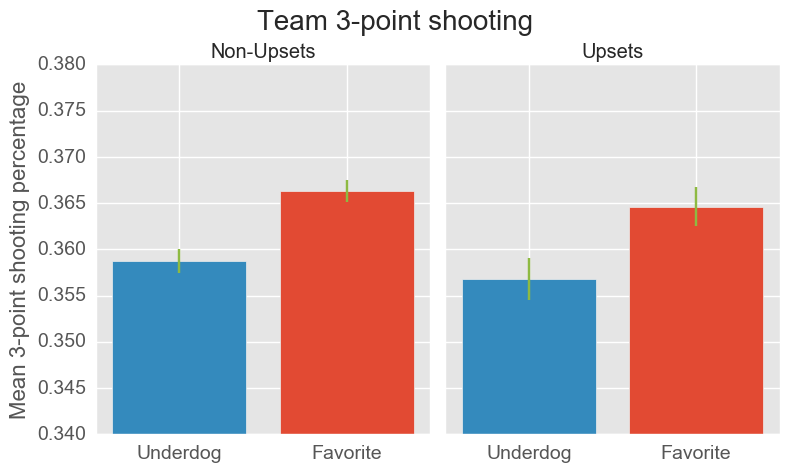

In [27]:
# compare travel distance for upsets and non-upsets
# separately for favorite team and underdogs
fig = plt.figure(figsize=(8,5))
st = fig.suptitle('Team 3-point shooting', fontsize=20)
fig.subplots_adjust(top=0.6)
plt.subplot(1, 2, 1)
functions = ['mean', 'std', 'count']
df = data.groupby('upset', as_index=False)['u_fg3pct', 'f_fg3pct'].agg(functions).reset_index()
df_1 = df['u_fg3pct'][df.upset==0].append(df['f_fg3pct'][df.upset==0])
x = [0, 1]
y = df_1['mean']
se = df_1['std'].divide(np.sqrt(df_1['count']))
plt.bar(x, y, color=[b, r], yerr=se, ecolor=g, align="center")
plt.title('Non-Upsets')
x_lab = ['Underdog', 'Favorite']
plt.xticks(x, x_lab, fontsize='14')
plt.xlim([np.min(x) - 0.5, np.max(x) + 0.5])
plt.ylabel('Mean 3-point shooting percentage', fontsize='16')
plt.ylim([0.34, 0.38])
plt.yticks(fontsize=14)
plt.subplot(1, 2, 2)
df_2 = df['u_fg3pct'][df.upset==1].append(df['f_fg3pct'][df.upset==1])
x = [0, 1]
y = df_2['mean']
se = df_2['std'].divide(np.sqrt(df_2['count']))
plt.bar(x, y, color=[b, r], yerr=se, ecolor=g, align="center")
plt.title('Upsets')
plt.xticks(x, x_lab, fontsize='14')
plt.xlim([np.min(x) - 0.5, np.max(x) + 0.5])
plt.ylim([0.34, 0.38])
plt.tick_params(axis='both', left='off', labelleft='off')
plt.tight_layout()
plt.show()

This looks like a case where conventional wisdom doesn't hold up, as underdog winners overall don't seem to have better 3-point shooting percentage than the losers. Many underdogs do ride hot 3-point shooting to upsets, but these data suggest the underdogs most likely to pull upsets don't necessarily have stronger 3-point shooting during the entire season. 

### Strength of schedule
The 2015-2016 NCAA basketball season involved 351 separate teams, and each team plays around 30 games. With so many teams, there are huge differences between teams in the quality of opponents played; some teams have several games against the top 50 teams in the country, while others have none. 

While a schedule comprised of tougher opponents can make it harder to accumulate wins, in theory a playing a tougher schedule also provides better preparation for the high-quality opponents usually faced in the tournament, as players gain valuable experience competing against top-tier teams.

Many sports statistics websites provide numerical ratings of each team's strength of schedule. Here I plot the average strength-of-schedule rating (obtained from http://www.sports-reference.com/cbb/) for both underdogs and favorites, to examine whether upsets tend to involve teams with a stronger or weaker strength of schedule.

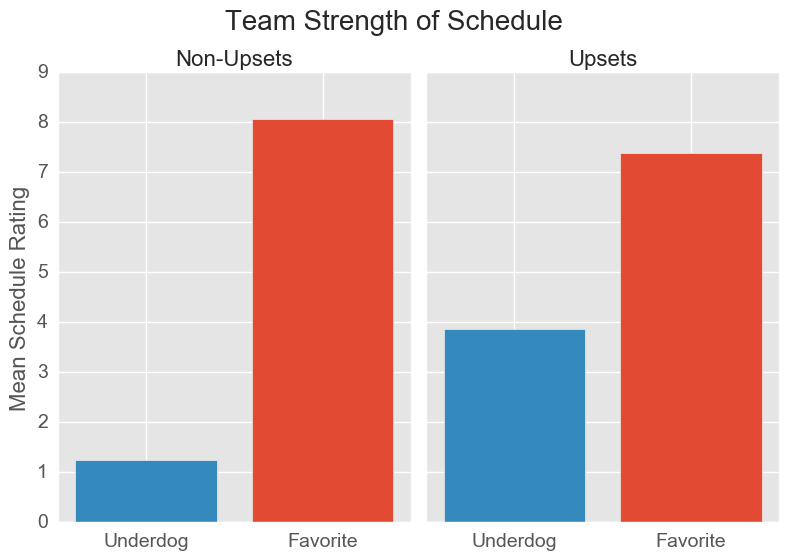

In [28]:
# compare team strength of Schedule
# separately for favored team and underdogs
fig = plt.figure(figsize=(8, 6))
st = fig.suptitle('Team Strength of Schedule', fontsize=20)
fig.subplots_adjust(top=0.3)
plt.subplot(1, 2, 1)
df = data.groupby('upset')['u_sos', 'f_sos'].mean().reset_index()
x = df['upset']
y = df.loc[0][1:]
plt.bar(x, y, color=[b, r], align="center",)
plt.title('Non-Upsets', fontsize=16)
x_lab = ['Underdog', 'Favorite']
plt.xticks(x, x_lab, fontsize=14)
plt.yticks(np.linspace(0, 9, num=10), fontsize=14)
plt.xlim([np.min(x) - 0.5, np.max(x) + 0.5])
plt.ylim([0, 9])
plt.ylabel('Mean Schedule Rating', fontsize=16)
plt.subplot(1, 2, 2)
x = df['upset']
y = df.loc[1][1:]
plt.bar(x, y, color=[b, r], align="center",)
plt.title('Upsets', fontsize=16)
plt.xticks(x, x_lab, fontsize=14)
plt.yticks(np.linspace(0, 9, num=10), fontsize=14)
plt.xlim([np.min(x) - 0.5, np.max(x) + 0.5])
plt.ylim([0, 9])
plt.tick_params(axis='both', left='off', labelleft='off')
plt.tight_layout()
plt.show()

The average schedule strength for underdogs who pulled upsets is far greater than the schedule strength for underdogs in non-upsets. This supports the idea that underdogs who play tougher opponents during the season are better prepared for competition against high-quality opponents in the NCAA tournament.  

### Coach tournament experience and success
We've mostly focused on a team's performance on the court, but coaches are also a potential source of influence on tournament upsets. 

Each tournament involves coaches with a mix of tournament experience: those coaching in their first tournament, hall-of-famers with decades of tournament experience, and those in between. The common belief is that coaches with more prior experience have a better chance of winning games in the tournament. 

Here I look at the tournament experience of each team's coach, calculated as the sum of previous tournaments attended, which could indicate whether tournament coaching experience contributes to upsets. 

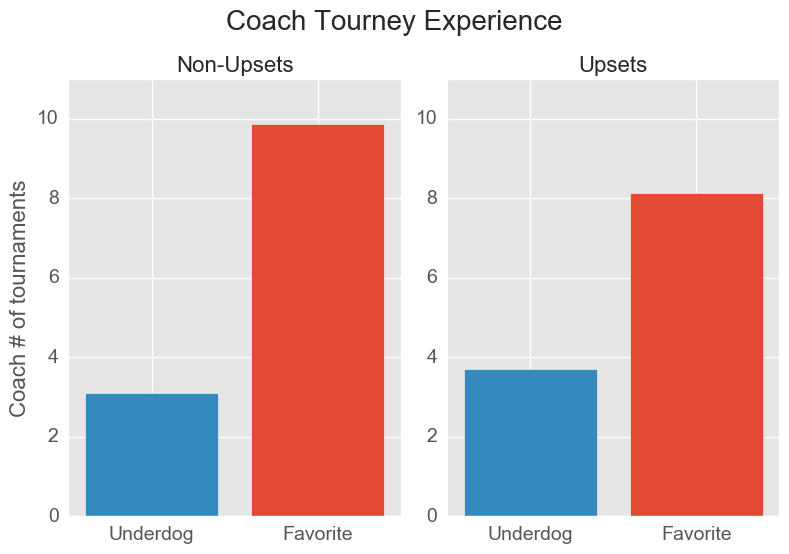

In [29]:
fig = plt.figure(figsize=(8, 6))
st = fig.suptitle('Coach Tourney Experience', fontsize=20)
fig.subplots_adjust(top=0.3)
plt.subplot(1, 2, 1)
df = data.groupby('upset')['u_cvisits', 'f_cvisits'].mean().reset_index()
x = df['upset']
y = df.loc[0][1:]
plt.bar(x, y, color=[b, r], align="center",)
plt.title('Non-Upsets', fontsize=16)
x_lab = ['Underdog', 'Favorite']
plt.xticks(x, x_lab, fontsize=14)
plt.xlim([np.min(x) - 0.5, np.max(x) + 0.5])
plt.ylabel('Coach # of tournaments', fontsize=16)
plt.ylim([0, 11])
plt.yticks(fontsize=14)
plt.subplot(1, 2, 2)
x = df['upset']
y = df.loc[1][1:]
plt.bar(x, y, color=[b, r], align="center",)
plt.title('Upsets', fontsize=16)
plt.xticks(x, x_lab, fontsize=14)
plt.xlim([np.min(x) - 0.5, np.max(x) + 0.5])
plt.ylim([0, 11])
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

The biggest difference seen here is the coach experience for the favorite teams: coaches of favorites who are upset by underdogs have less tourney experience than the favorites who win. 

In addition to experience, coaches have had various levels of success in prior tournaments. Perhaps coaches who have previously won more tournament games possess some skill that helps in leading teams to an upset (for underdogs) or prevent one from happening (for favorites). 

Here I examine coach tournament success as the highest number of games coached in a single tournament, which can range from 0 (no tourney experience) to 6 (coach has reached the final round). This metric has the advantage of providing a single index that accounts for coaches who have not coached in any tournament games, those who have coached in the tournament but not yet won, and those with varying levels of prior success in winning tournament games.

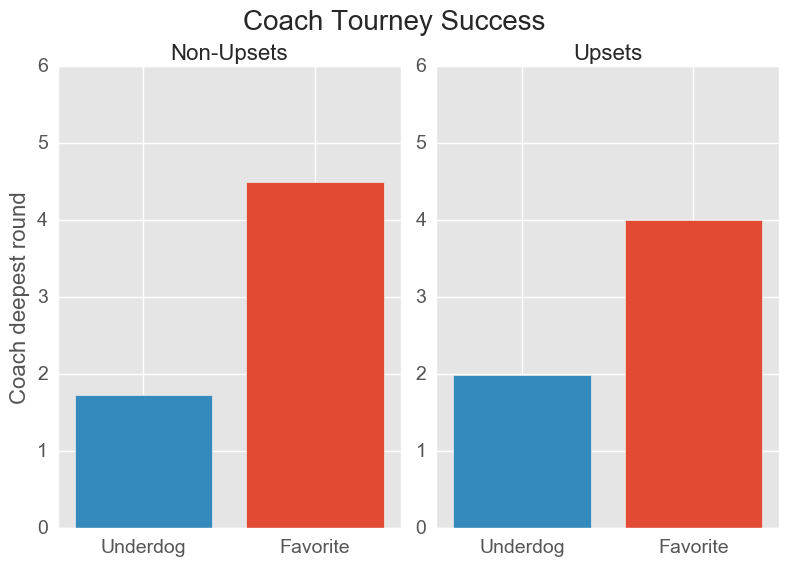

In [30]:
# coach experience in tournament
# separately for favored team and underdogs
fig = plt.figure(figsize=(8, 6))
st = fig.suptitle('Coach Tourney Success', fontsize=20)
fig.subplots_adjust(top=0.3)
plt.subplot(1, 2, 1)
df = data.groupby('upset')['u_cfar', 'f_cfar'].mean().reset_index()
x = df['upset']
y = df.loc[0][1:]
plt.bar(x, y, color=[b, r], align="center",)
plt.title('Non-Upsets', fontsize=16)
x_lab = ['Underdog', 'Favorite']
plt.xticks(x, x_lab, fontsize=14)
plt.xlim([np.min(x) - 0.5, np.max(x) + 0.5])
plt.ylabel('Coach deepest round', fontsize=16)
plt.yticks(np.linspace(0, 6, num=7), fontsize=14)
plt.ylim([0, 6])
plt.subplot(1, 2, 2)
x = df['upset']
y = df.loc[1][1:]
plt.bar(x, y, color=[b, r], align="center",)
plt.title('Upsets', fontsize=16)
plt.xticks(x, x_lab, fontsize=14)
plt.xlim([np.min(x) - 0.5, np.max(x) + 0.5])
plt.yticks(np.linspace(0, 6, num=7), fontsize=14)
plt.ylim([0, 6])
plt.tight_layout()
plt.show()

The pattern here tells a similar story as coach experience, as underdogs involved in upsets have coaches with slightly more prior tournament success, while the favorites in upsets are led by coaches with less tournament success than the favorites who won. 

## Summary
This data exploration exercise provided several insights regarding upsets in the NCAA tournament.
### Seeds and seed matchups
- Given the large number of possible seed-seed combinations for matchups in the tournament, it's surprising that only a small subset of matchup types account for 85% of the games that have upset potential. These include the Round 1-2 matchups for underdogs seeded 11-16, and the Round 2 games involving favorites seeded 1-2. Because these matchups comprise an overwhelming majority of upset-potential games, predicting outcomes of these games with a high level of accuracy could be one way to maximize upset detection. 
- Of these common matchups, the highest upset rates occur in games involving 11-12 seed underdogs and 2-seed favorites:
    - 11 vs 6, Round 1, 41%
    - 12 vs 5, Round 1, 41%
    - 10 vs 2, Round 2, 37%
    - 7 vs 2, Round 2, 33%
    - 11 vs 3, Round 2, 32%
    - 12 vs 4, Round 2, 24% 

- No other common matchup has an average upset rate greater than 20%. 

Most well-informed college basketball fans are aware of the common upsets by 11 and 12-seeds in Round 1, but I was surprised to see the relatively strong upset rates of these teams in Round 2, as well as the high upset rates in games pitting 2-seeds against underdogs seeded 7/10. This pattern suggests that a good place to start for picking upsets is to find the most vulnerable 2-seeds and the strongest 11-12 seeds in the field. 
### Recipe for an upset
In addition to the seed matchups, several characteristics of the teams involved in upset-potential games seem to distinguish when an upset is more likely to happen. 
- Underdog has the combination of a better-than-average offense and defense (offensive efficiency above 100 & defensive efficiency below 100).
- The underdog has an efficency margin of at least 10, while the favorite's margin is no greater than 25.
- The favorite does not have a large travel distance advantage.
- The favorite does not have a large advantage in returning tourney experience. 
- The underdog typically creates more extra posessions through offensive rebounds and turnovers than the favorite. 
- The underdog has a relatively strong strength of schedule.
- The favorite is led by a coach with relatively low prior tournament experience or success. 

It comes as no surprise that winning underdogs need to have good offense & defense. I was surprised by the lack of a difference in 3-point shooting between underdogs who won and underdogs who lost, and by the pronounced impact of offensive rebounding and turnover margin. 

### Remaining Questions and Next steps
In this project we examined each factor in isolation, and without conducting a more comprehensive analysis, we don't know the nature of the relationship between all of these factors and upset probability. Some of these factors likely overlap: underdogs with stronger strength of schedule are also likely to receive a lower seed (schedules are considered when seeding teams), and teams with high offensive rebounding/turnover margins also likely have more proficient offenses. Because these upset factors may overlap, their effects on upset probability may not be additive. The presence of each additional upset factor may not further increase the probability of an upset. 

For most of the team indicators, we viewed the average level for teams involved in non-upsets and upsets. This is a reasonable approach to identify some characteristics that may contribute to upsets. However, when using these features to decide when to predict an upset or not, one would have to create some decision points to use. For example, when is the travel distance gap for favorites sufficiently small to predict an upset? The average levels displayed in the plots above may not be the best decision points to use.

These issues can be addressed by testing various types of statistical models with these data. Such models can be used to weigh the importance of multiple features simultaneously, and produce an estimate of the probability of an upset for each individual matchup. This exploratory exercise has identified several promising candidates for initial testing in such models to predict upsets in the NCAA tournament. 